# Feature 4 : Average time per edge

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DATA_FOLDER = "../data/"
PATHS_AND_GRAPH = DATA_FOLDER + "wikispeedia_paths-and-graph/"
PATHS_FINISHED = PATHS_AND_GRAPH + "paths_finished.tsv"
PATHS_UNFINISHED = PATHS_AND_GRAPH + "paths_unfinished.tsv"

# data exploration
paths_finished = pd.read_csv(
    PATHS_FINISHED,
    sep="\t",
    header=None,
    names=["hashedIpAddress", "timestamp", "durationInSec", "path", "rating"],
    encoding="utf-8",
    skiprows=16,
).copy(deep=True)
paths_finished["timestamp"] = pd.to_datetime(paths_finished["timestamp"], unit="s")

paths_unfinished = pd.read_csv(
    PATHS_UNFINISHED,
    sep="\t",
    header=None,
    names=["hashedIpAddress", "timestamp", "durationInSec", "path", "target", "type"],
    encoding="utf-8",
    skiprows=17,
).copy(deep=True)
paths_unfinished["timestamp"] = pd.to_datetime(paths_unfinished["timestamp"], unit="s")

# Remove annoying future warnings in pandas and seaborn with new python versions
import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

## What does the average time taken per edge look like?

Is it a nice distribution?

,durationInSec,path,path_length,coarse_mean_time
0,166,14th_century;15th_century;16th_century;Pacific...,9,18.444444
1,88,14th_century;Europe;Africa;Atlantic_slave_trad...,5,17.600000
2,138,14th_century;Niger;Nigeria;British_Empire;Slav...,8,17.250000
3,37,14th_century;Renaissance;Ancient_Greece;Greece,4,9.250000
4,175,14th_century;Italy;Roman_Catholic_Church;HIV;R...,7,25.000000
...,...,...,...,...
51313,66,Yagan;Ancient_Egypt;Civilization,3,22.000000
51314,165,Yagan;Folklore;Brothers_Grimm;<;19th_century;C...,9,18.333333
51315,228,Yagan;Australia;England;France;United_States;T...,7,32.571429
51316,56,Yarralumla%2C_Australian_Capital_Territory;Aus...,4,14.000000


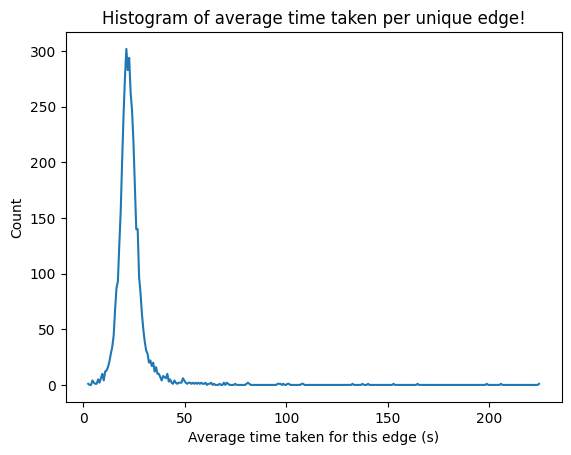

'Gaussianity' Shapiro test p-value: 4.676840558622769e-33


In [2]:
from collections import defaultdict
import scipy

paths_and_time_fin = paths_finished[["durationInSec", "path"]].copy()
paths_and_time_fin["path_length"] = paths_and_time_fin["path"].apply(
    lambda x: len(x.split(";"))
)
paths_and_time_fin["coarse_mean_time"] = (
    paths_and_time_fin["durationInSec"] / paths_and_time_fin["path_length"]
)

display(paths_and_time_fin)

times_per_edge = defaultdict(list)

for idx, row in paths_and_time_fin.iterrows():
    elems_path = row["path"].split(";")
    for elem in elems_path:
        times_per_edge[elem].append(row["durationInSec"] / row["path_length"])

times_per_edge_micro = {key: np.mean(value) for key, value in times_per_edge.items()}

# p3 = sns.histplot(x = list(times_per_edge_micro.values()), bins=320)
np_hist = np.histogram(list(times_per_edge_micro.values()), bins=320)
p3 = sns.lineplot(x=np_hist[1][:-1], y=np_hist[0])
plt.xlabel("Average time taken for this edge (s)")
plt.ylabel("Count")
plt.title("Histogram of average time taken per unique edge!")
plt.show()

print("'Gaussianity' Shapiro test p-value:", scipy.stats.shapiro(np_hist[0]).pvalue)

We can clearly see a Gaussian distribution of this data, which makes it particularly appealing.
We also already have a dataframe (see the above) which contains the metrics for each path, which also makes it easier for use later on!